<a href="https://colab.research.google.com/github/teena496/Data-Analyst-Capstone-Project/blob/main/Lab_15_Box_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-22 15:21:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  51.0MB/s    in 3.9s    

2025-04-22 15:22:05 (51.3 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [ ]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [ ]:
QUERY = """
SELECT name as Table_Name
FROM sqlite_master
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [ ]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


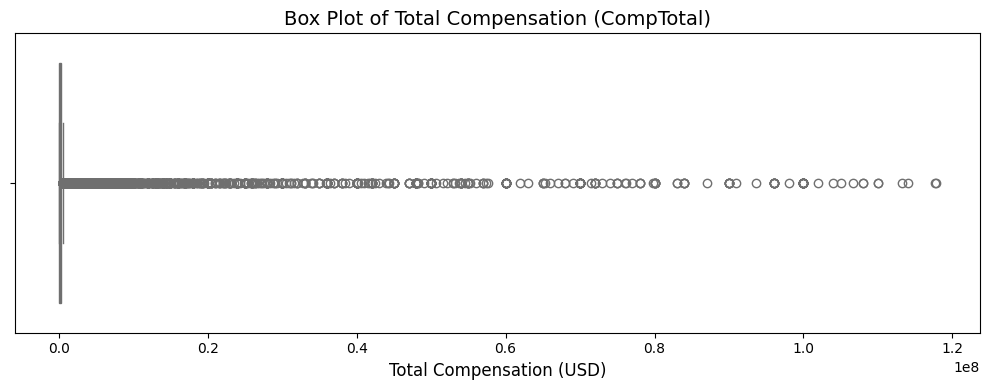

In [ ]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Filter out missing or invalid compensation values
comp_df = df[['CompTotal']].dropna()
comp_df = comp_df[comp_df['CompTotal'] > 0]  # Filter out zero or negative compensation

# Optional: Remove extreme outliers for better visualization (e.g., top 1%)
comp_df = comp_df[comp_df['CompTotal'] < comp_df['CompTotal'].quantile(0.99)]

# Plotting the box plot
plt.figure(figsize=(10, 4))
sns.boxplot(data=comp_df, x='CompTotal', color='skyblue')

plt.title('Box Plot of Total Compensation (CompTotal)', fontsize=14)
plt.xlabel('Total Compensation (USD)', fontsize=12)
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


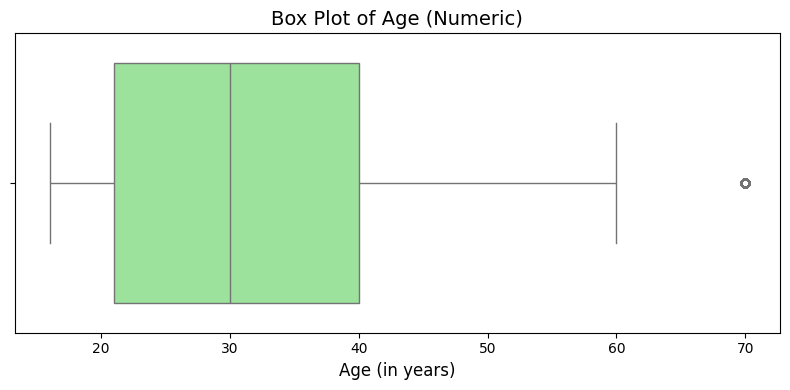

In [ ]:
# your code goes here
QUERY = "SELECT Age FROM main"
df = pd.read_sql_query(QUERY, conn)

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['Age_numeric'] = df['Age'].map(age_map)


import matplotlib.pyplot as plt
import seaborn as sns

# Filter out NaN values
age_df = df[['Age_numeric']].dropna()

plt.figure(figsize=(8, 4))
sns.boxplot(x=age_df['Age_numeric'], color='lightgreen')

plt.title('Box Plot of Age (Numeric)', fontsize=14)
plt.xlabel('Age (in years)', fontsize=12)
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_4119/2089884548.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box, x='Age', y='CompTotal', palette='pastel')


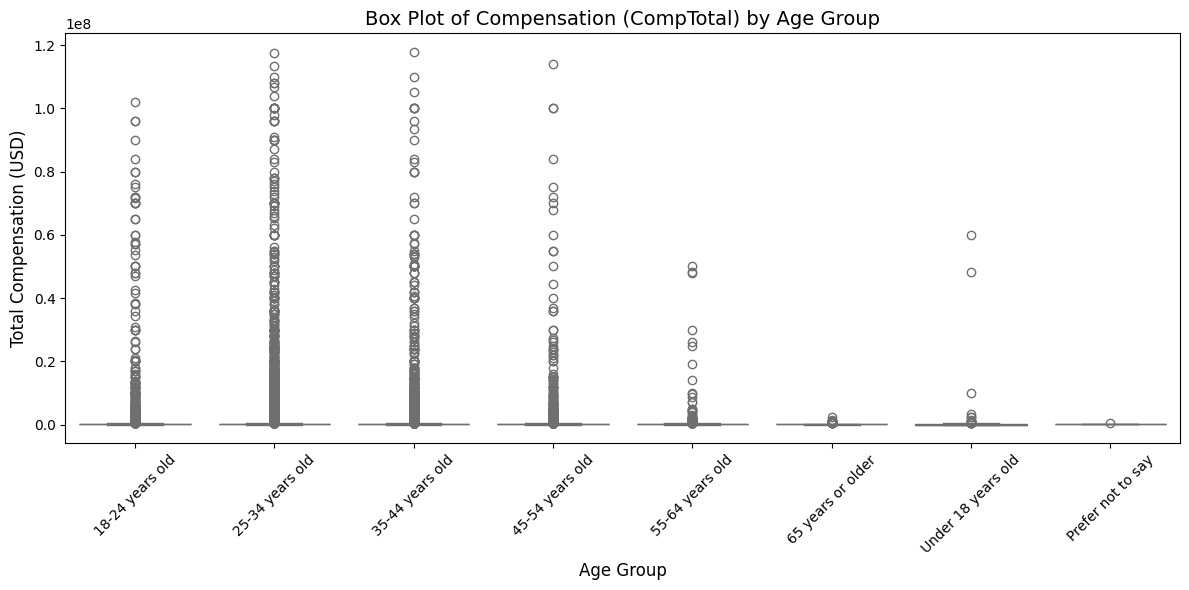

In [ ]:
# your code goes here
QUERY = "SELECT Age,CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean and filter data
df_box = df[['Age', 'CompTotal']].dropna()
df_box = df_box[df_box['CompTotal'] > 0]  # Filter invalid values
df_box = df_box[df_box['CompTotal'] < df_box['CompTotal'].quantile(0.99)]  # Remove extreme outliers

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_box, x='Age', y='CompTotal', palette='pastel')

plt.title('Box Plot of Compensation (CompTotal) by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


/tmp/ipykernel_4119/178695303.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_box_satisfaction, x='JobSatPoints_6', y='CompTotal', palette='pastel')


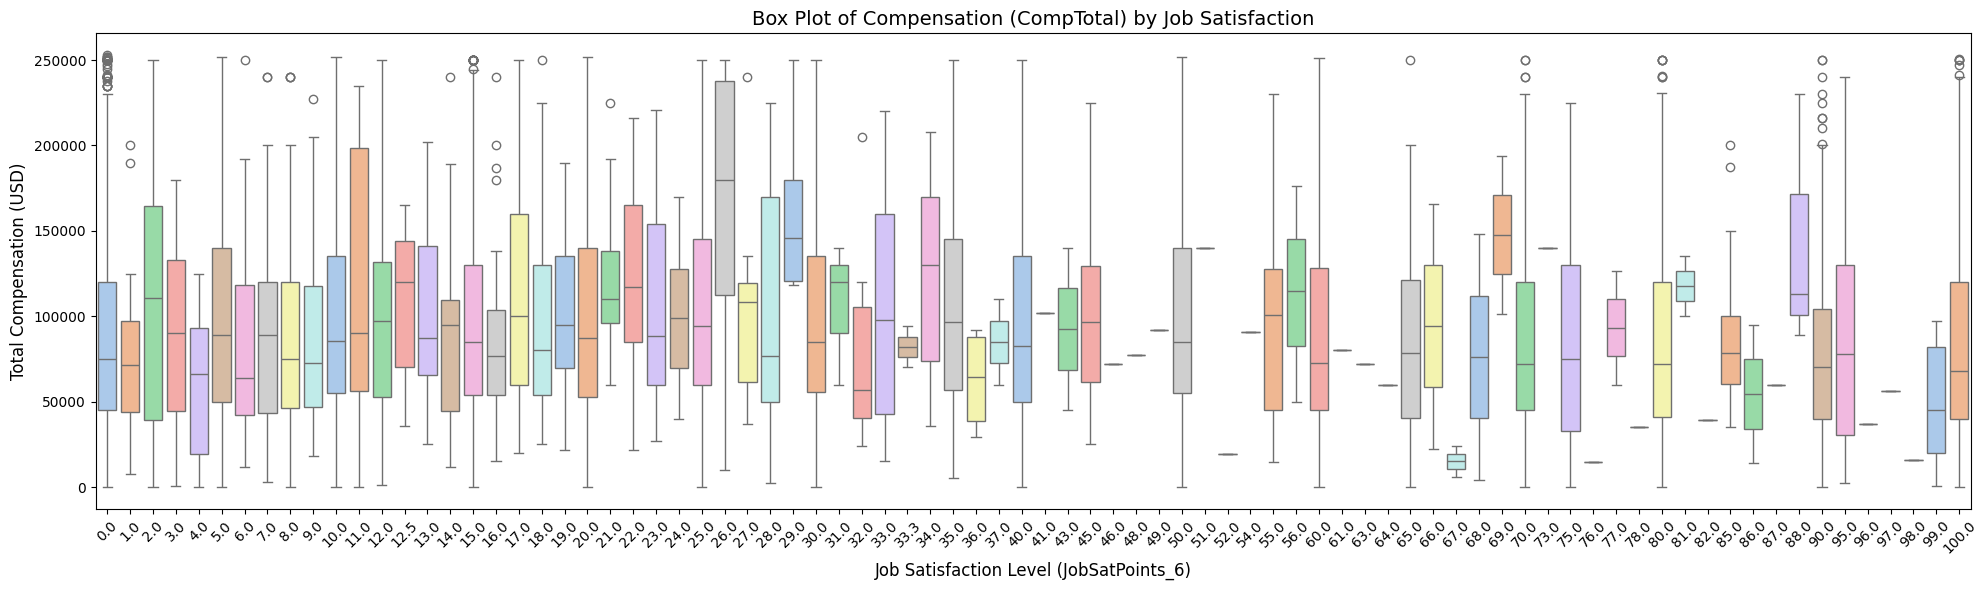

In [ ]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = "SELECT CompTotal,JobSatPoints_6 FROM main"
df = pd.read_sql_query(QUERY, conn)

# Filter out missing values
df_box_satisfaction = df[['JobSatPoints_6', 'CompTotal']].dropna()

# Filter out extreme compensation values (optional but helps in visualization)
df_box_satisfaction = df_box_satisfaction[df_box_satisfaction['CompTotal'] > 0]  # Remove zero/negative values
df_box_satisfaction = df_box_satisfaction[df_box_satisfaction['CompTotal'] < df_box_satisfaction['CompTotal'].quantile(0.75)]  # Remove extreme outliers

# Plotting the box plot
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_box_satisfaction, x='JobSatPoints_6', y='CompTotal', palette='pastel')

plt.title('Box Plot of Compensation (CompTotal) by Job Satisfaction', fontsize=14)
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)', fontsize=12)
plt.ylabel('Total Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


/tmp/ipykernel_4119/4168864939.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_5_roles, x='DevType', y='ConvertedCompYearly', palette='Set2')


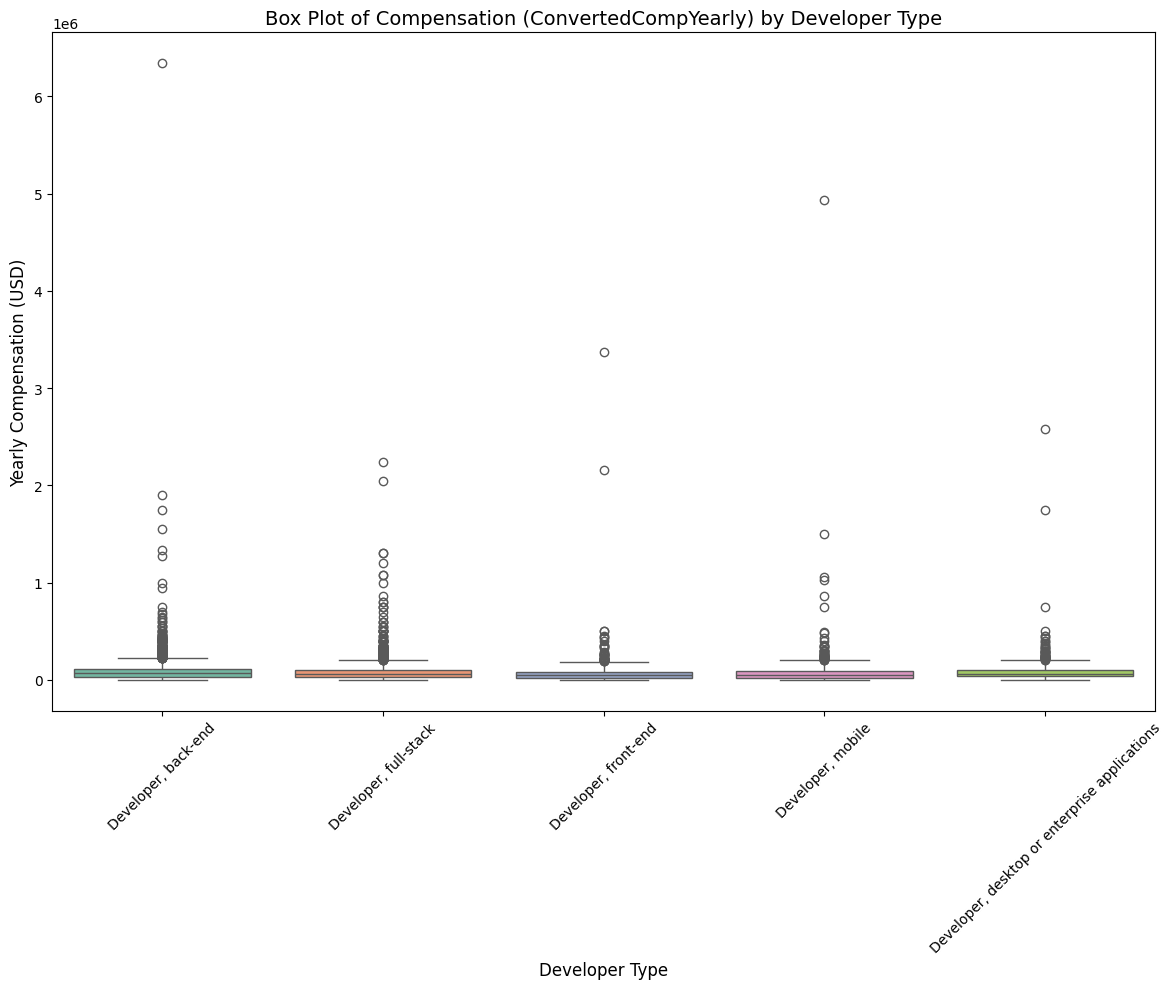

In [ ]:
# your code goes here
QUERY = "SELECT ConvertedCompYearly,DevType FROM main"
df = pd.read_sql_query(QUERY, conn)

# Filter the dataset to include only relevant columns
df_developer_roles = df[['DevType', 'ConvertedCompYearly']].dropna()

# Get the top 5 most frequent developer types
top_5_roles = df_developer_roles['DevType'].value_counts().nlargest(5).index

# Filter the data to include only the top 5 developer roles
df_top_5_roles = df_developer_roles[df_developer_roles['DevType'].isin(top_5_roles)]

# Plotting the box plot
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_top_5_roles, x='DevType', y='ConvertedCompYearly', palette='Set2')

# Title and labels
plt.title('Box Plot of Compensation (ConvertedCompYearly) by Developer Type', fontsize=14)
plt.xlabel('Developer Type', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


/tmp/ipykernel_4119/353186205.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_5_countries, x='Country', y='CompTotal', palette='Set2')


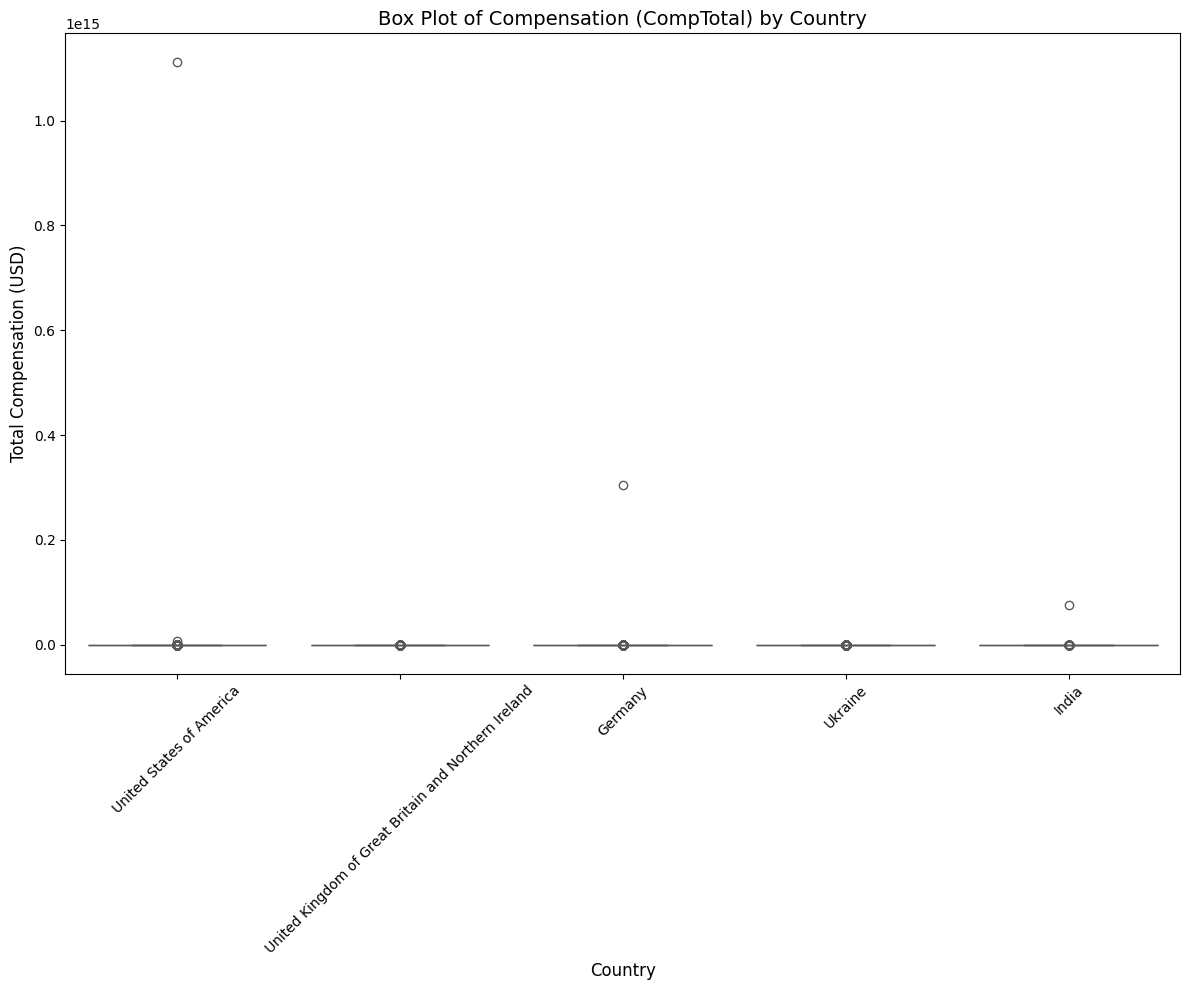

In [ ]:
# your code goes here
QUERY = "SELECT Country,CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

# Filter the dataset to include only relevant columns
df_countries = df[['Country', 'CompTotal']].dropna()

# Get the top 5 most frequent countries
top_5_countries = df_countries['Country'].value_counts().nlargest(5).index

# Filter the data to include only the top 5 countries
df_top_5_countries = df_countries[df_countries['Country'].isin(top_5_countries)]

# Plotting the box plot
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_top_5_countries, x='Country', y='CompTotal', palette='Set2')

# Title and labels
plt.title('Box Plot of Compensation (CompTotal) by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


/tmp/ipykernel_4119/2487509006.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_employment, x='Employment_Type', y='CompTotal', palette='Set3')


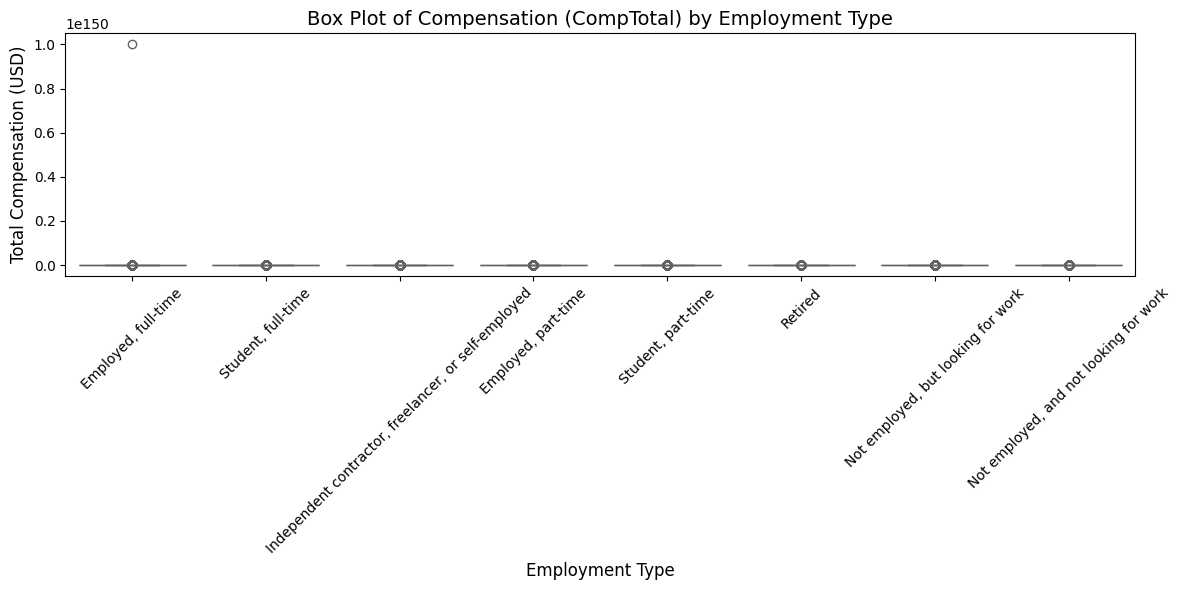

In [ ]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

QUERY = """SELECT Employment, CompTotal from main """
df = pd.read_sql_query(QUERY, conn)

df_employment = df_employment.assign(
    Employment_Type=df['Employment'].str.split(';')
).explode('Employment_Type')
# Filter the dataset to include only relevant columns
df_employment = df_employment[['Employment_Type', 'CompTotal']].dropna()

# Plotting the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_employment, x='Employment_Type', y='CompTotal', palette='Set3')

# Title and labels
plt.title('Box Plot of Compensation (CompTotal) by Employment Type', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Total Compensation (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


/tmp/ipykernel_4119/894568050.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_job_satisfaction, x='JobSatPoints_6', y='YearsCodePro_numeric', palette='Set3')


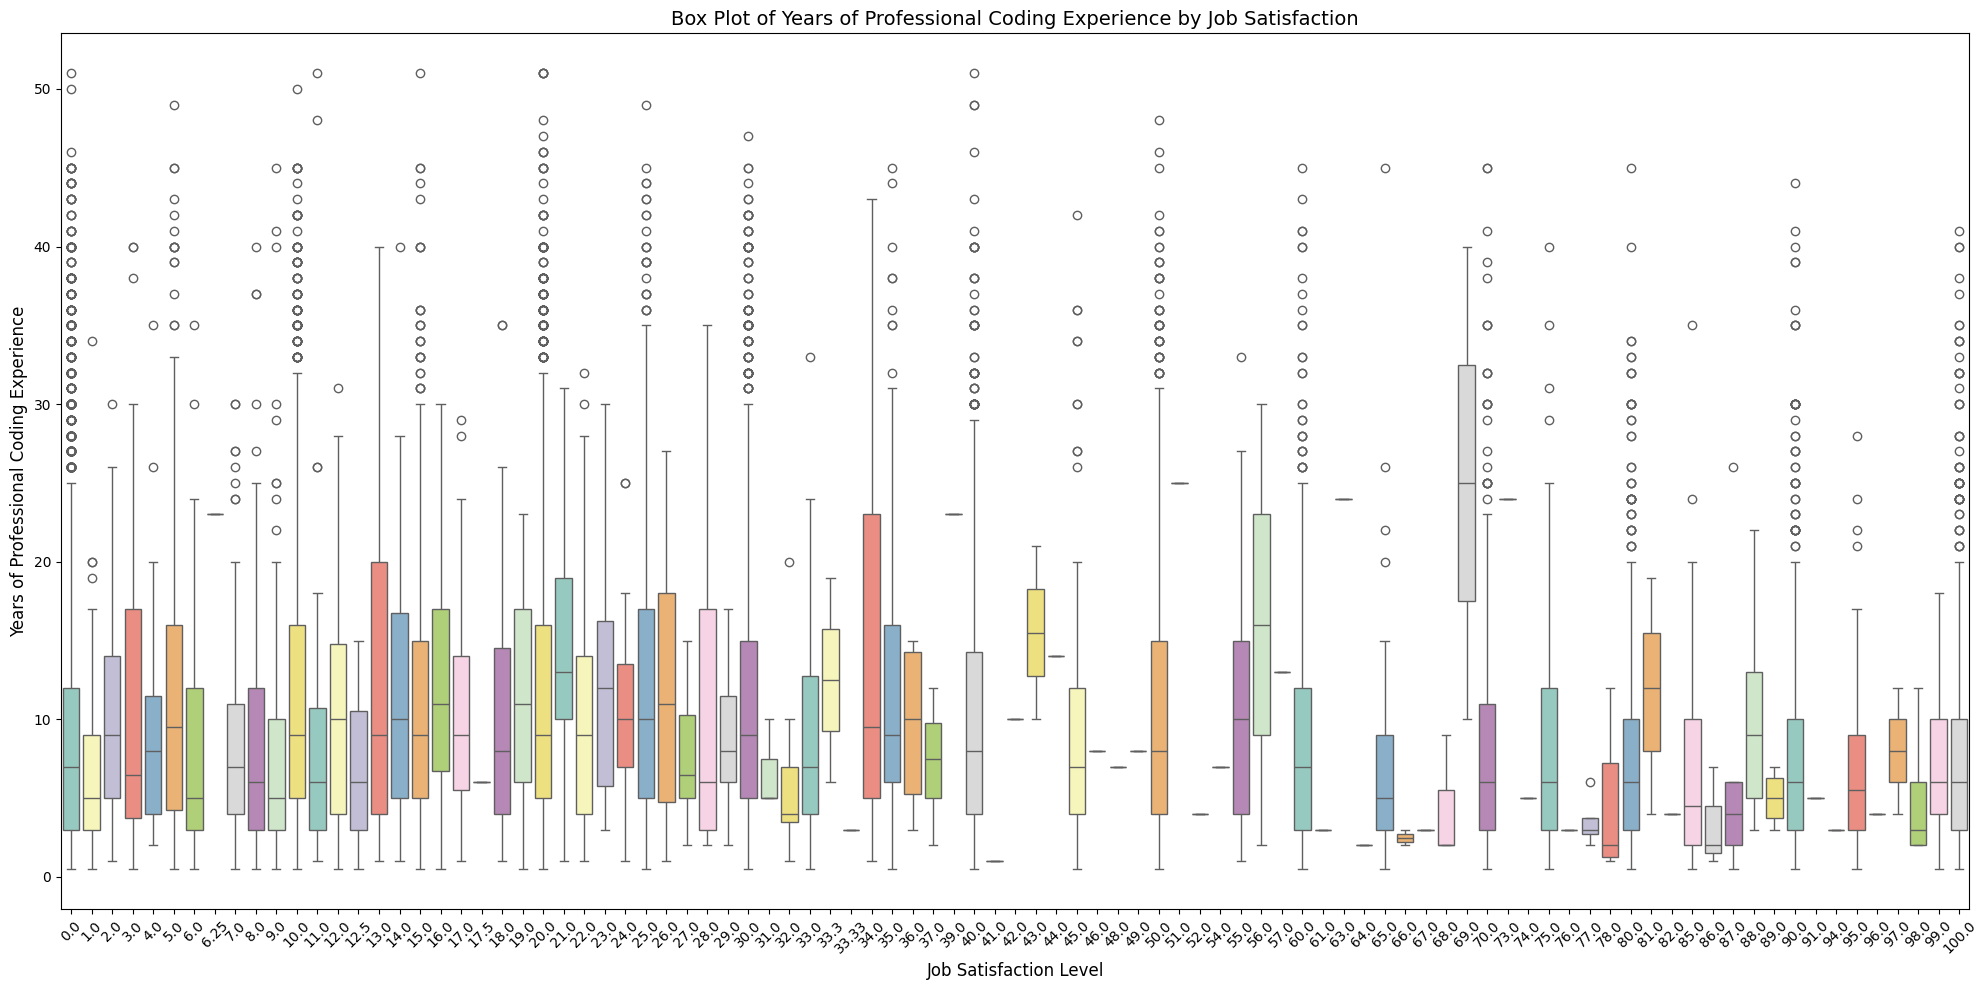

In [ ]:
# your code goes here

QUERY = """SELECT YearsCodePro, JobSatPoints_6 from main """
df = pd.read_sql_query(QUERY, conn)
# Filter the dataset to include only relevant columns
df_job_satisfaction = df[['JobSatPoints_6', 'YearsCodePro']].dropna()
def convert_years(x):
    if x == 'Less than 1 year':
        return 0.5
    elif x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df_job_satisfaction['YearsCodePro_numeric'] = df_job_satisfaction['YearsCodePro'].apply(convert_years)
df_job_satisfaction.dropna(inplace=True)
# Plotting the box plot
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_job_satisfaction, x='JobSatPoints_6', y='YearsCodePro_numeric', palette='Set3')

# Title and labels
plt.title('Box Plot of Years of Professional Coding Experience by Job Satisfaction', fontsize=14)
plt.xlabel('Job Satisfaction Level', fontsize=12)
plt.ylabel('Years of Professional Coding Experience', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [ ]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
